# Data Science - Data Understanding Assignment

Anggota kelompok:

*   Yahya Ilham Riyadi - 24060122130069
*   	Ardy Hasan Rona Akhmad - 24060122130053
* Yusuf Zaenul Mustofa -	24060122120021
* Zahidan Aqila Faiha PAB - 	24060122140101
* Zikry Alfahri Akram -	24060122120033

Sains Data A

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [ ]:
# Example of reading a csv file from a gdrive link

# Take the file id from the gdrive file url
# https://drive.google.com/file/d/1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU/view?usp=sharing => The file id is 1ZUtiaty9RPXhpz5F2Sy3dFPHF4YIt5iU
# and then put it in this format:
# https://drive.google.com/uc?id={file_id}
# Don't forget to change the access to public

# link : https://drive.google.com/file/d/1ftnH7n8CXQonH9r68hJfdOJNcI2w_Vu_/view?usp=sharing

df = pd.read_csv('https://drive.google.com/uc?id=1ftnH7n8CXQonH9r68hJfdOJNcI2w_Vu_', encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


# Explorartory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

## Data Understanding
The objective of this section is for participants to understand the quality of the provided data. This includes:

1. Data Size
2. Statistics of Each Feature
3. Outliers
4. Correlation
5. Distribution

### Step 1

Find the following:

1. The size of the data (instances and features).
2. The data types of each feature.
3. The number of unique values for categorical features.
4. The minimum, maximum, mean, median, and standard deviation values for non-categorical features.
5. Explain the significance of gathering the first four pieces of information.

In [ ]:
# Step 1: Data Understanding

# 1. Size of the data
data_size = df.shape

# 2. Data types of each feature
data_types = df.dtypes

# 3. Number of unique values for categorical features (assuming 'country' is categorical)
unique_values = df.nunique()

# 4. Descriptive statistics for numerical features
numerical_stats = df.describe()

# Format Output
print("### Data Understanding ###\n")

# Data Size
print(f"1. Data Size (Rows, Columns): {data_size}\n")

# Data Types
print("2. Data Types:")
print(data_types)
print("\n")

# Unique Values
print("3. Unique Values per Column:")
print(unique_values)
print("\n")

# Numerical Features Statistics
print("4. Numerical Features Statistics:")
numerical_stats

### Data Understanding ###

1. Data Size (Rows, Columns): (541909, 8)

2. Data Types:
InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


3. Unique Values per Column:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64


4. Numerical Features Statistics:


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
# Contoh: Mencari baris dengan UnitPrice minimal
min_price_idx = df['UnitPrice'].idxmin()  # Mendapatkan indeks nilai minimal
min_price_row = df.loc[min_price_idx]     # Mengambil baris berdasarkan indeks
print("Baris dengan UnitPrice minimal:")
print(min_price_row)

Baris dengan UnitPrice minimal:
InvoiceNo               A563186
StockCode                     B
Description     Adjust bad debt
Quantity                      1
InvoiceDate    12-08-2011 14:51
UnitPrice             -11062.06
CustomerID                  NaN
Country          United Kingdom
Name: 299983, dtype: object


### Step 2

Find the following:

1. Missing values for each feature.
2. Outliers for each feature (use the methods you are familiar with).
3. Why is it necessary to identify missing values and outliers?

In [ ]:
# Step 2: Missing Values and Outliers

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

# Membuat tabel
missing_values = df.isnull().sum()
outliers = df.select_dtypes(include=['number']).apply(count_outliers)

# Gabungkan hasil menjadi DataFrame
summary_table = pd.DataFrame({
    'Missing Values': missing_values,
    'Outliers': outliers
}).sort_values(by='Missing Values', ascending=False)
print(summary_table)

             Missing Values  Outliers
CustomerID           135080       0.0
Description            1454       NaN
Country                   0       NaN
InvoiceDate               0       NaN
InvoiceNo                 0       NaN
Quantity                  0   58619.0
StockCode                 0       NaN
UnitPrice                 0   39627.0


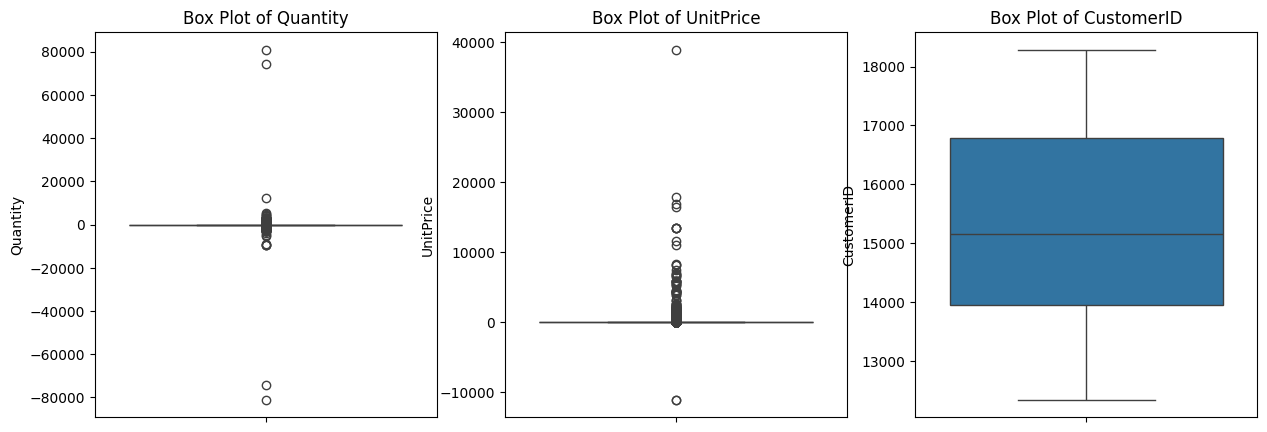

In [ ]:
# Pilih hanya kolom numerik
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Tentukan jumlah kolom per baris pada subplot
n_cols = 3
n_rows = -(-len(numerical_features) // n_cols)  # Hitung jumlah baris (ceil)

# Buat subplot
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten array axes untuk mempermudah iterasi

# Buat box plot untuk setiap fitur numerik
for i, column in enumerate(numerical_features):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f"Box Plot of {column}")
    axes[i].set_ylabel(column)

# Hapus subplot kosong jika jumlah fitur tidak genap
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

# df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
# # plt.tight_layout()  # Atur tata letak agar tidak saling tumpang tindih
# plt.show()


### Step 3

Find the following:

1. Correlations between features.
2. Visualize the distribution of each feature (categorical and continuous).
3. Visualize the correlation between features and the target variable.
4. Explain the significance of understanding feature distributions and correlations.

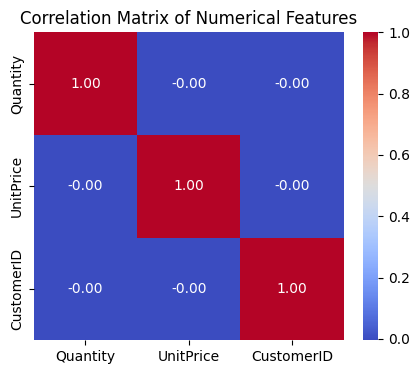

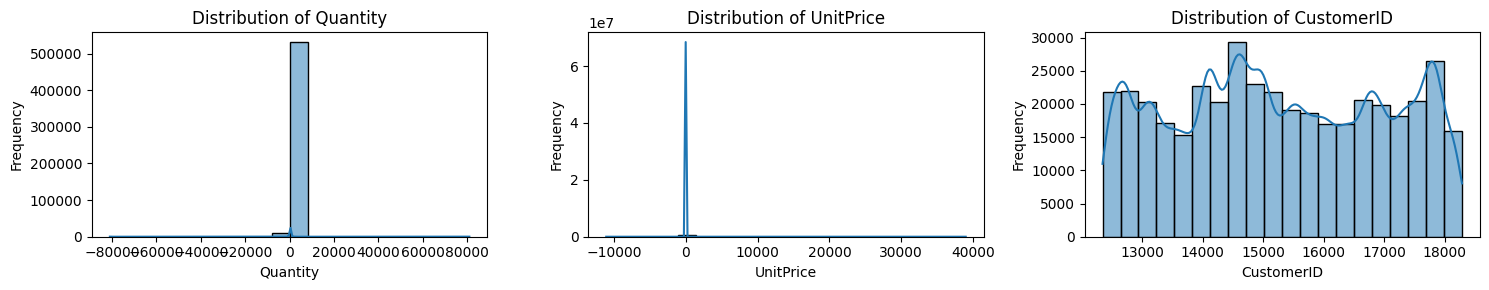

In [ ]:
# Step 3: Correlation and Distributions

# 1. Correlation matrix
correlation_matrix = df.select_dtypes(include=[np.number]).corr()

# 2. Visualizing the correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 3. Visualizing distributions of each feature
# numerical_features = df.select_dtypes(include=[np.number]).columns
# for feature in numerical_features:
#     plt.figure(figsize=(3, 2))
#     sns.histplot(df[feature], kde=True, bins=20)
#     plt.title(f"Distribution of {feature}")
#     plt.xlabel(feature)
#     plt.ylabel("Frequency")
#     plt.show()


# Identifikasi fitur numerik
numerical_features = df.select_dtypes(include=[np.number]).columns

# Tentukan jumlah fitur dan ukuran subplot
num_features = len(numerical_features)
rows = (num_features + 2) // 3  # Hitung jumlah baris (3 kolom)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 3))  # Set ukuran subplot

# Flatten axes untuk akses mudah
axes = axes.flatten()

# Iterasi melalui setiap fitur numerik
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, bins=20, ax=axes[i])

    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

# Hapus subplot kosong jika ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preparation


In [ ]:
# Mengecek missing values dan tipe data
print("\nInformasi Data:")
print(df.info())

print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())


Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Jumlah Missing Values per Kolom:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [ ]:
# Penanganan Missing Values
# Hapus baris yang bernilai null
df = df.dropna()
print("\nData setelah menghapus baris dengan missing values:")
print(df.info())


Data setelah menghapus baris dengan missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB
None


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df_negatif = df[df['Quantity'] < 0]

# Tampilkan hasilnya
print(df_negatif)
df_negatif.info()

# Drop kolom dengan nilai negatif
df = df[df['Quantity'] >= 0]
df.describe()

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

             InvoiceDate  UnitPrice  CustomerID         Country  
141     01-12-2010 09:41      27.50     14527

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
# Konversi Tipe Data
# Pastikan kolom 'InvoiceDate' dalam format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = "%d-%m-%Y %H:%M")

# Mengubah kolom CustomerID yang sebelumnya berupa float menjadi tipe integer
df['CustomerID'] = df['CustomerID'].astype(int)

### RFM
Extracting R (Recency), F (Frequency), M (Monetary) columns form the data

In [ ]:
# RFM implementation

# Mengalikan Quantity dengan UnitPrice untuk mendapatkan Amount, lalu menyimpannya ke dalam variabel Amount.
df["Amount"]  = df.Quantity * df.UnitPrice

#### Monetary value

In [ ]:
# Monetary Function

# Menghitung total jumlah uang yang dibelanjakan oleh setiap pelanggan
monetary = df.groupby("CustomerID").Amount.sum()
monetary = monetary.reset_index()
monetary.head()

,CustomerID,Amount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40


#### Frequency Value

In [ ]:
# Frequency function

# Menghitung jumlah pesanan yang dilakukan oleh setiap pelanggan berdasarkan CustomerID.
frequency = df.groupby("CustomerID").InvoiceNo.count()
frequency = frequency.reset_index()
frequency.head()

,CustomerID,InvoiceNo
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17


##### Merging Amount & Frequency Column

In [ ]:
# Creating master dataset
master = monetary.merge(frequency, on = "CustomerID", how = "inner")
master.head()

,CustomerID,Amount,InvoiceNo
0,12346,77183.60,1
1,12347,4310.00,182
2,12348,1797.24,31
3,12349,1757.55,73
4,12350,334.40,17


#### Recency Value

In [ ]:
# Mencari data tanggal maksimum
maximum = max(df.InvoiceDate)

# Menambahkan satu hari ke tanggal maksimum agar selisihnya menjadi 1 dan bukan nol.
maximum = maximum + pd.DateOffset(days = 1)

df['diff'] = maximum - df.InvoiceDate
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,374 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,374 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,374 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,374 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,374 days 04:24:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   InvoiceNo    397924 non-null  object         
 1   StockCode    397924 non-null  object         
 2   Description  397924 non-null  object         
 3   Quantity     397924 non-null  int64          
 4   InvoiceDate  397924 non-null  datetime64[ns] 
 5   UnitPrice    397924 non-null  float64        
 6   CustomerID   397924 non-null  int64          
 7   Country      397924 non-null  object         
 8   Amount       397924 non-null  float64        
 9   diff         397924 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(4), timedelta64[ns](1)
memory usage: 33.4+ MB


In [ ]:
# Menggabungkan DataFrame berdasarkan nilai recency
recency = df.groupby('CustomerID')['diff'].min()
recency = recency.reset_index()
recency.head()

,CustomerID,diff
0,12346,326 days 02:49:00
1,12347,2 days 20:58:00
2,12348,75 days 23:37:00
3,12349,19 days 02:59:00
4,12350,310 days 20:49:00


#### RFM Combined DataFrame

In [ ]:
# Menggabungkan semua parameter Recency, Frequency, dan Monetary
RFM = master.merge(recency, on = "CustomerID")
RFM.columns = ['CustomerID','Amount','Frequency','Recency']
RFM.head()

,CustomerID,Amount,Frequency,Recency
0,12346,77183.60,1,326 days 02:49:00
1,12347,4310.00,182,2 days 20:58:00
2,12348,1797.24,31,75 days 23:37:00
3,12349,1757.55,73,19 days 02:59:00
4,12350,334.40,17,310 days 20:49:00


In [ ]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   CustomerID  4339 non-null   int64          
 1   Amount      4339 non-null   float64        
 2   Frequency   4339 non-null   int64          
 3   Recency     4339 non-null   timedelta64[ns]
dtypes: float64(1), int64(2), timedelta64[ns](1)
memory usage: 135.7 KB


### Data Insight

Tujuan dari bagian ini ialah agar menambah pemahaman tentang bagaimana cara memformulasi dan menemukan insights dari dataset sehingga kedepannya dapat meningkatkan performa dari model. Beberapa contoh pertanyaan:


1.   Siapa pelanggan yang paling aktif (sering belanja)?

2.  Siapa pelanggan yang terakhir kali melakukan transaksi dalam waktu dekat?

3.  Pelanggan mana yang paling menguntungkan (paling banyak belanja)?

4.  Bagaimana distribusi pelanggan berdasarkan masing-masing nilai R, F, dan M?



In [ ]:
# Top 5 pelanggan berdasarkan frekuensi transaksi
top_active_customers = RFM.sort_values(by='Frequency', ascending=False).head(5)
print("Top 5 Pelanggan Paling Aktif (sering belanja):")
print(top_active_customers[['CustomerID', 'Frequency']])

Top 5 Pelanggan Paling Aktif (sering belanja):
      CustomerID  Frequency
4011       17841       7847
1880       14911       5677
1290       14096       5111
326        12748       4596
1662       14606       2700


**Kesimpulan:**

Pelanggan ini sering melakukan transaksi. Mereka menunjukkan tingkat loyalitas yang tinggi terhadap bisnis.

**Saran Tindakan:**

*   Berikan program loyalitas atau reward seperti poin atau diskon khusus.
*   Kirim penawaran eksklusif secara berkala untuk menjaga keterikatan.
*   Libatkan mereka dalam feedback survey karena mereka aktif dan bisa memberikan insight berharga.

In [ ]:
# Top 5 pelanggan dengan waktu transaksi terakhir paling baru
top_recent_customers = RFM.sort_values(by='Recency').head(5)
print("Top 5 Pelanggan Terbaru (transaksi paling baru):")
print(top_recent_customers[['CustomerID', 'Recency']])

Top 5 Pelanggan Terbaru (transaksi paling baru):
      CustomerID         Recency
271        12680 1 days 00:00:00
581        13113 1 days 00:01:00
2543       15804 1 days 00:19:00
1059       13777 1 days 00:25:00
3824       17581 1 days 00:29:00


**Kesimpulan:**

Pelanggan ini baru saja melakukan transaksi. Mereka masih hangat dan potensial untuk dirawat menjadi pelanggan tetap.

**Saran Tindakan:**

* Kirim email ucapan terima kasih atau welcome package.
* Tawarkan diskon pembelian berikutnya agar mereka kembali dalam waktu dekat.
* Berikan pengalaman yang dipersonalisasi, seperti rekomendasi produk berdasarkan transaksi terakhir.

In [ ]:
# Top 5 pelanggan berdasarkan total pembelian (Amount)
top_valuable_customers = RFM.sort_values(by='Amount', ascending=False).head(5)
print("Top 5 Pelanggan Paling Menguntungkan (total belanja tertinggi):")
print(top_valuable_customers[['CustomerID', 'Amount']])


Top 5 Pelanggan Paling Menguntungkan (total belanja tertinggi):
      CustomerID     Amount
1690       14646  280206.02
4202       18102  259657.30
3729       17450  194550.79
3009       16446  168472.50
1880       14911  143825.06


**Kesimpulan:**

Pelanggan ini menghabiskan uang paling banyak dan menjadi sumber pendapatan utama.

**Saran Tindakan:**

* Jadikan mereka prioritas layanan, misalnya dengan customer support premium.

* Berikan akses VIP ke produk baru, promosi, atau event khusus.

* Kirimkan ucapan spesial saat ulang tahun atau hari raya untuk menjaga relasi personal.

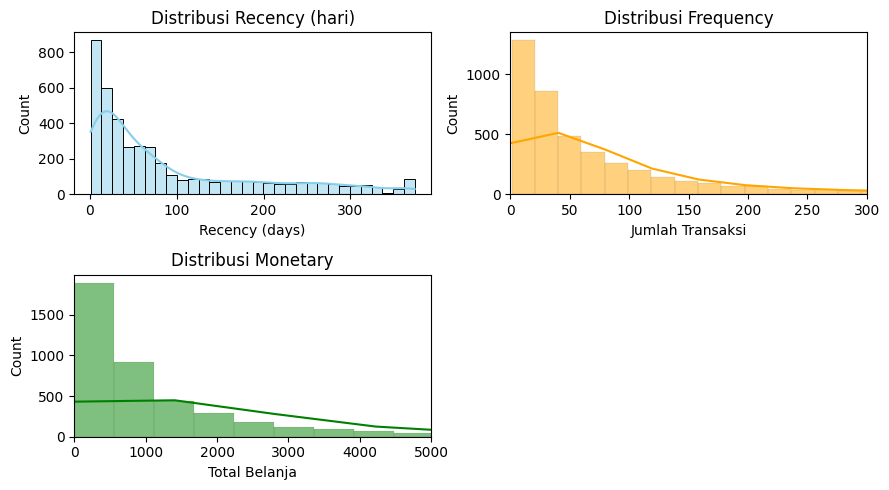

In [ ]:
# Distribusi pelanggan berdasarkan masing-masing R, F, M
# Buat 3 plot untuk Recency, Frequency, Amount
plt.figure(figsize=(9, 5))

# Recency
plt.subplot(2, 2, 1)
sns.histplot(RFM['Recency'].dt.days, bins=30, kde=True, color='skyblue')
plt.title("Distribusi Recency (hari)")
plt.xlabel("Recency (days)")

# Frequency
plt.subplot(2, 2, 2)
sns.histplot(RFM['Frequency'], bins=400, kde=True, color='orange')
plt.title("Distribusi Frequency")
plt.xlabel("Jumlah Transaksi")
plt.xlim(0, 300)


# Monetary
plt.subplot(2, 2, 3)
sns.histplot(RFM['Amount'], bins=500, kde=True, color='green')
plt.title("Distribusi Monetary")
plt.xlabel("Total Belanja")
plt.xlim(0, 5000)

plt.tight_layout()
plt.show()


** Analisis Distribusi RFM customer **

1. Distribusi Recency

* Sebagian besar pelanggan memiliki nilai
recency rendah (di bawah 50 hari), artinya mereka baru-baru ini melakukan transaksi. Mengindikasikan pelanggan aktif masih banyak dan mendominasi


* Terdapat sekelompok kecil pelanggan dengan recency yang sangat tinggi (> 200 hari), menandakan pelanggan sudah tidak aktif kembali. Pelanggan ini perlu dijangkau kembali dengan program re-engagement perusahaan/toko.

2. Distribusi Frequency

* Distribusi condong ke kiri, artinya mayoritas pelanggan sedikit bertransaksi ( < 50). Hal ini mengindikasikan banyak pelanggan yang belum loyal, para pelanggan ini perlu ditarget agar menjadi pelanggan yang loyal

3. Distribusi Monetary

* mayoritas pelanggan menghabiskan total belanja yang relatif kecil (< 1000).

* sebagian kecil pelanggan menghabiskan total belanja yang relatif besar (> 3000). Para pelanggan ini perlu dijaga relasinya.

### Penanganan Outlier

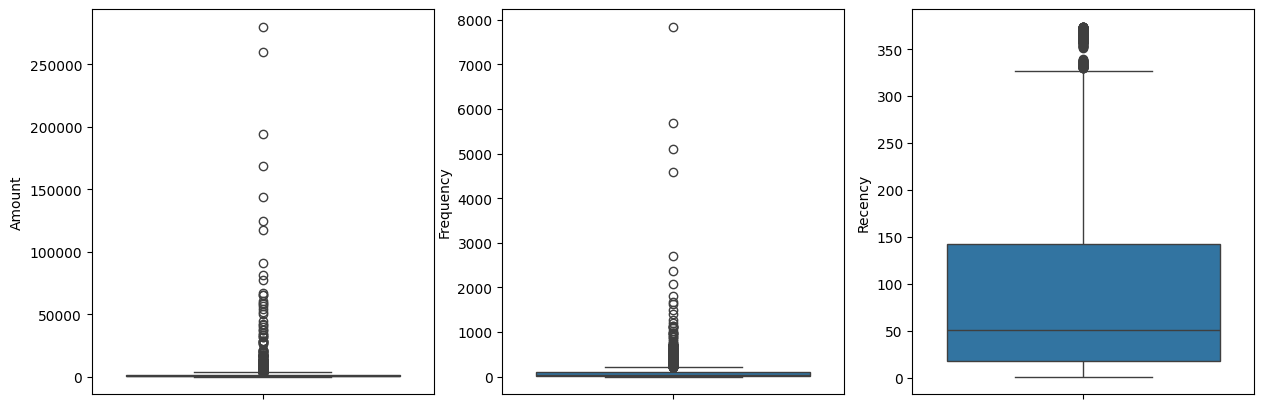

In [ ]:
fig, axs = plt.subplots(1,3, figsize = (15,5))

sns.boxplot(RFM.Amount, ax = axs[0])
sns.boxplot(RFM.Frequency, ax = axs[1])
sns.boxplot(RFM.Recency.dt.days, ax = axs[2])

plt.tight_layout
plt.show()

Amount (Removal): Batas [-1724.35, 3693.23] | Baris dihapus: 427
Frequency (Removal): Batas [-81.00, 175.00] | Baris dihapus: 251
Recency (Removal): Batas [-197.00, 391.00] | Baris dihapus: 0
------------------------------
Jumlah baris setelah metode removal IQR: 3661
Total baris yang dihapus: 678
------------------------------
Amount (Winsorization): Batas [-1724.3474999999999, 3693.2325] | Nilai di-cap: 427 (0 bawah, 427 atas)
Frequency (Winsorization): Batas [-107.5, 224.5] | Nilai di-cap: 380 (0 bawah, 380 atas)
Recency (Winsorization): Batas [-169 days +09:23:45, 329 days 04:45:45] | Nilai di-cap: 155 (0 bawah, 155 atas)
------------------------------
Jumlah baris setelah metode Winsorization: 4339
Total nilai yang di-cap (diubah ke batas): 962
Jumlah baris tetap sama dengan data asli karena tidak ada data yang dihapus.
------------------------------


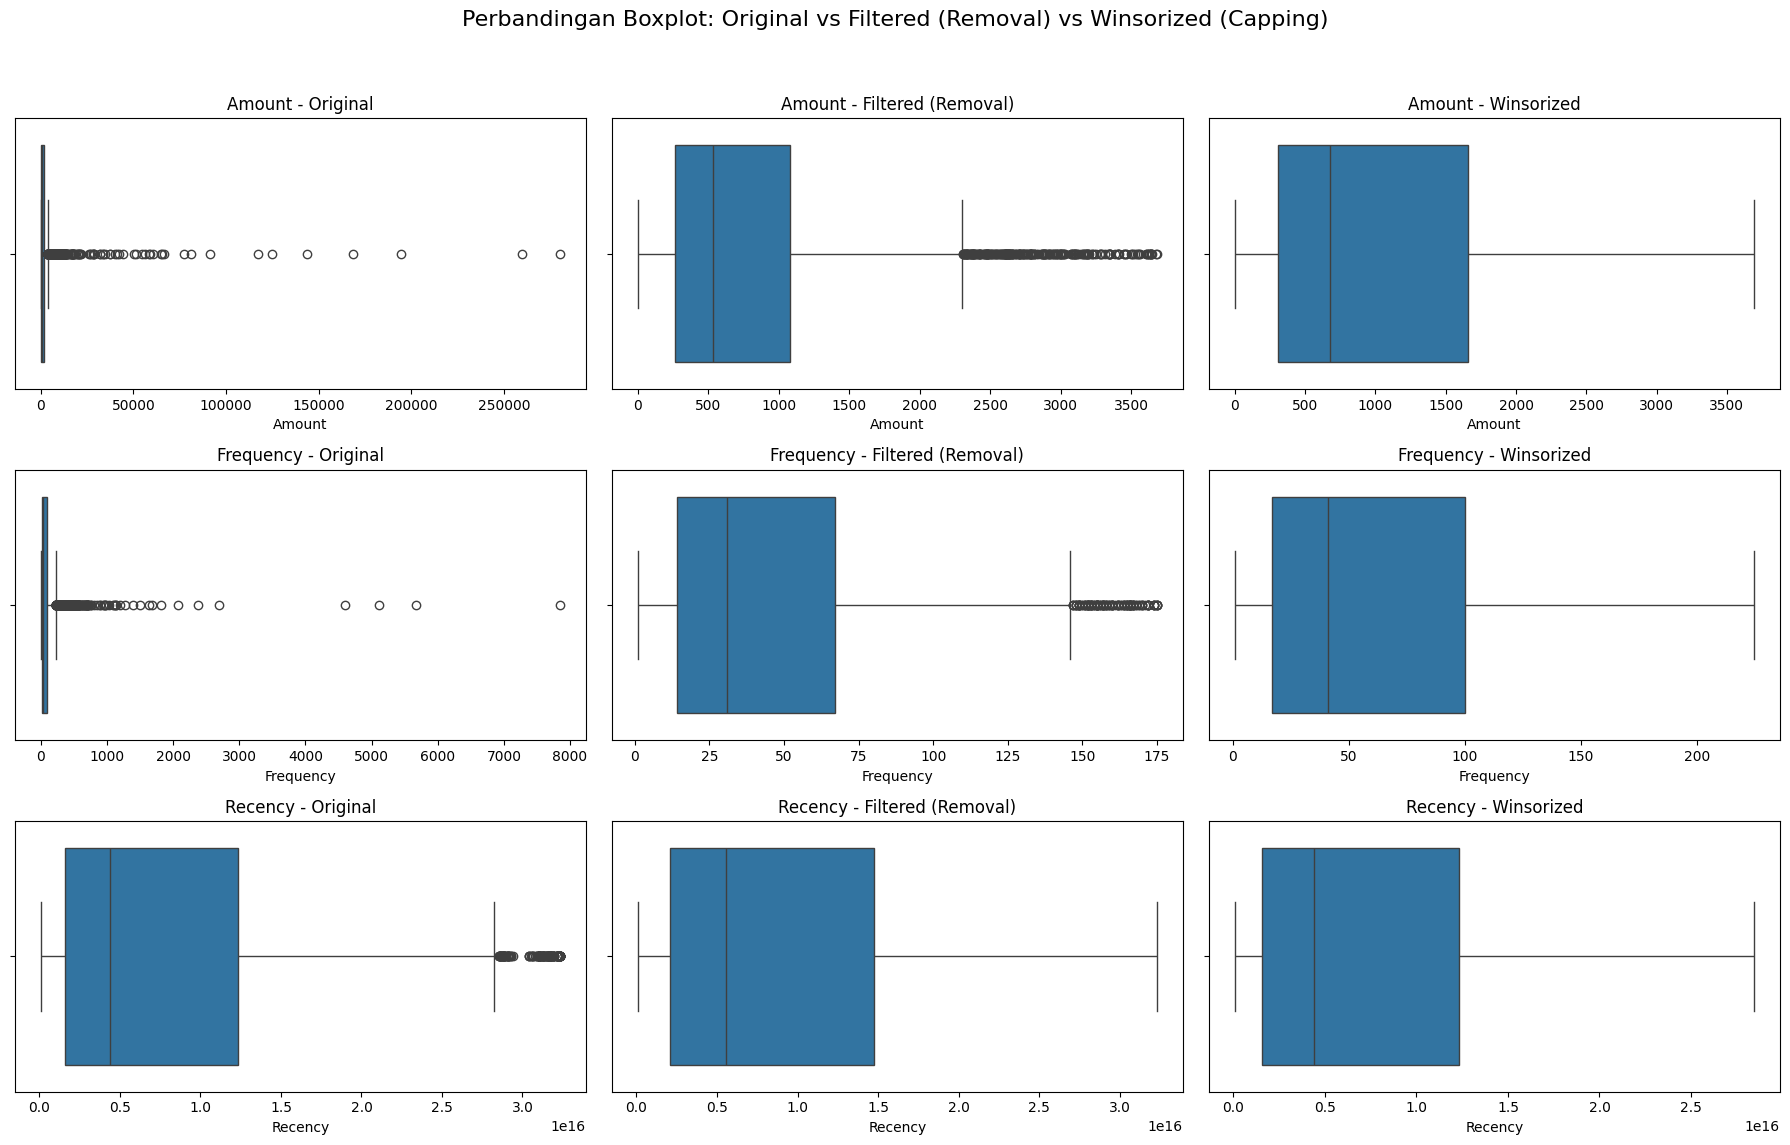


--- Analisis Outlier Visual Pasca-Filtering (Seperti di Boxplot) ---
Outlier visual tersisa di 'Amount' (setelah removal): 237
Outlier visual tersisa di 'Frequency' (setelah removal): 114
Outlier visual tersisa di 'Recency' (setelah removal): 0

--- Analisis Outlier Visual Pasca-Winsorization ---
Outlier visual tersisa di 'Amount' (setelah winsorization, thdp batas asli): 0
Outlier visual tersisa di 'Frequency' (setelah winsorization, thdp batas asli): 0
Outlier visual tersisa di 'Recency' (setelah winsorization, thdp batas asli): 0


In [ ]:
# --- 1. Metode Awal Anda: Penghapusan Outlier (Removal) ---
# Kita terapkan lagi pada salinan data asli untuk konsistensi
RFM_filtered = RFM.copy()

# Outlier treatment for Amount (Removal)
Q1_filt_am = RFM_filtered.Amount.quantile(0.25)
Q3_filt_am = RFM_filtered.Amount.quantile(0.75)
IQR_filt_am = Q3_filt_am - Q1_filt_am
lower_filt_am = Q1_filt_am - 1.5 * IQR_filt_am
upper_filt_am = Q3_filt_am + 1.5 * IQR_filt_am
count_before_am = len(RFM_filtered)
RFM_filtered = RFM_filtered[(RFM_filtered.Amount >= lower_filt_am) & (RFM_filtered.Amount <= upper_filt_am)]
count_after_am = len(RFM_filtered)
print(f"Amount (Removal): Batas [{lower_filt_am:.2f}, {upper_filt_am:.2f}] | Baris dihapus: {count_before_am - count_after_am}")

# Outlier treatment for Frequency (Removal)
# Perhatikan: Q1, Q3, IQR dihitung ulang pada data yang sudah terfilter Amount
Q1_filt_fq = RFM_filtered.Frequency.quantile(0.25)
Q3_filt_fq = RFM_filtered.Frequency.quantile(0.75)
IQR_filt_fq = Q3_filt_fq - Q1_filt_fq
lower_filt_fq = Q1_filt_fq - 1.5 * IQR_filt_fq
upper_filt_fq = Q3_filt_fq + 1.5 * IQR_filt_fq
count_before_fq = len(RFM_filtered)
RFM_filtered = RFM_filtered[(RFM_filtered.Frequency >= lower_filt_fq) & (RFM_filtered.Frequency <= upper_filt_fq)]
count_after_fq = len(RFM_filtered)
print(f"Frequency (Removal): Batas [{lower_filt_fq:.2f}, {upper_filt_fq:.2f}] | Baris dihapus: {count_before_fq - count_after_fq}")


# Outlier treatment for Recency (Removal)
# Dihitung ulang lagi pada data yang sudah terfilter Amount & Frequency
Q1_filt_rc = RFM_filtered.Recency.quantile(0.25)
Q3_filt_rc = RFM_filtered.Recency.quantile(0.75)
IQR_filt_rc = Q3_filt_rc - Q1_filt_rc
lower_filt_rc = Q1_filt_rc - 1.5 * IQR_filt_rc
upper_filt_rc = Q3_filt_rc + 1.5 * IQR_filt_rc
count_before_rc = len(RFM_filtered)
RFM_filtered = RFM_filtered[(RFM_filtered.Recency >= lower_filt_rc) & (RFM_filtered.Recency <= upper_filt_rc)]
count_after_rc = len(RFM_filtered)
# Convert Timedelta to days to enable formatting with .2f
lower_filt_rc_days = lower_filt_rc.days
upper_filt_rc_days = upper_filt_rc.days
print(f"Recency (Removal): Batas [{lower_filt_rc_days:.2f}, {upper_filt_rc_days:.2f}] | Baris dihapus: {count_before_rc - count_after_rc}")

print("-" * 30)
print(f"Jumlah baris setelah metode removal IQR: {len(RFM_filtered)}")
print(f"Total baris yang dihapus: {len(RFM) - len(RFM_filtered)}")
print("-" * 30)


# --- 2. Metode Winsorization (Capping) Menggunakan Batas dari Data Asli ---
RFM_winsorized = RFM.copy()

cols_to_winsorize = ['Amount', 'Frequency', 'Recency']
total_capped_values = 0

for col in cols_to_winsorize:
    # Hitung batas HANYA dari data ASLI (RFM_original)
    Q1 = RFM[col].quantile(0.25)
    Q3 = RFM[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung jumlah nilai yang akan di-cap sebelum melakukan clip
    original_values = RFM_winsorized[col]
    capped_lower_count = (original_values < lower_bound).sum()
    capped_upper_count = (original_values > upper_bound).sum()
    total_capped_col = capped_lower_count + capped_upper_count
    total_capped_values += total_capped_col

    # Check if the column is 'Recency' and convert bounds to Timedelta if necessary
    if col == 'Recency':
        # Ensure lower_bound and upper_bound are Timedelta objects
        lower_bound = pd.to_timedelta(lower_bound)
        upper_bound = pd.to_timedelta(upper_bound)

    print(f"{col} (Winsorization): Batas [{lower_bound}, {upper_bound}] | Nilai di-cap: {total_capped_col} ({capped_lower_count} bawah, {capped_upper_count} atas)")

    # Terapkan Winsorization (capping) menggunakan .clip()
    RFM_winsorized[col] = RFM_winsorized[col].clip(lower=lower_bound, upper=upper_bound)

print("-" * 30)
print(f"Jumlah baris setelah metode Winsorization: {len(RFM_winsorized)}")
print(f"Total nilai yang di-cap (diubah ke batas): {total_capped_values}")
print("Jumlah baris tetap sama dengan data asli karena tidak ada data yang dihapus.")
print("-" * 30)


# --- 3. Perbandingan Visual dengan Boxplot ---
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Perbandingan Boxplot: Original vs Filtered (Removal) vs Winsorized (Capping)', fontsize=16)

# Amount
sns.boxplot(x=RFM['Amount'], ax=axs[0, 0]).set_title('Amount - Original')
sns.boxplot(x=RFM_filtered['Amount'], ax=axs[0, 1]).set_title('Amount - Filtered (Removal)')
sns.boxplot(x=RFM_winsorized['Amount'], ax=axs[0, 2]).set_title('Amount - Winsorized')

# Frequency
sns.boxplot(x=RFM['Frequency'], ax=axs[1, 0]).set_title('Frequency - Original')
sns.boxplot(x=RFM_filtered['Frequency'], ax=axs[1, 1]).set_title('Frequency - Filtered (Removal)')
sns.boxplot(x=RFM_winsorized['Frequency'], ax=axs[1, 2]).set_title('Frequency - Winsorized')

# Recency
sns.boxplot(x=RFM['Recency'], ax=axs[2, 0]).set_title('Recency - Original')
# Hati-hati jika RFM_filtered kosong, tambahkan pengecekan
if not RFM_filtered.empty:
    sns.boxplot(x=RFM_filtered['Recency'], ax=axs[2, 1]).set_title('Recency - Filtered (Removal)')
else:
     axs[2, 1].set_title('Recency - Filtered (Kosong)')
sns.boxplot(x=RFM_winsorized['Recency'], ax=axs[2, 2]).set_title('Recency - Winsorized')


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make space for suptitle
plt.show()

# --- Analisis Tambahan (Opsional) ---
# Anda bisa melihat jumlah outlier yang TERLIHAT di boxplot setelah filtering
# Ini terjadi karena Q1,Q3,IQR dihitung ulang pada data terfilter
print("\n--- Analisis Outlier Visual Pasca-Filtering (Seperti di Boxplot) ---")
if not RFM_filtered.empty:
    for col in ['Amount', 'Frequency', 'Recency']:
        Q1_new = RFM_filtered[col].quantile(0.25)
        Q3_new = RFM_filtered[col].quantile(0.75)
        IQR_new = Q3_new - Q1_new
        lower_bound_new = Q1_new - 1.5 * IQR_new
        upper_bound_new = Q3_new + 1.5 * IQR_new
        outliers_visible = RFM_filtered[(RFM_filtered[col] < lower_bound_new) | (RFM_filtered[col] > upper_bound_new)]
        print(f"Outlier visual tersisa di '{col}' (setelah removal): {len(outliers_visible)}")
else:
    print("DataFrame hasil filtering kosong, tidak ada outlier visual tersisa.")

print("\n--- Analisis Outlier Visual Pasca-Winsorization ---")
for col in ['Amount', 'Frequency', 'Recency']:
    # Batas dihitung dari data asli
    Q1_orig = RFM[col].quantile(0.25)
    Q3_orig = RFM[col].quantile(0.75)
    IQR_orig = Q3_orig - Q1_orig
    lower_bound_orig = Q1_orig - 1.5 * IQR_orig
    upper_bound_orig = Q3_orig + 1.5 * IQR_orig

    # Check if the column is 'Recency' and convert to days for comparison
    if col == 'Recency':
        # Convert Timedelta objects to days
        lower_bound_orig = lower_bound_orig.days
        upper_bound_orig = upper_bound_orig.days
        RFM_winsorized['Recency'] = RFM_winsorized['Recency'].dt.days # Convert to numeric to enable the comparison.

    # Cek data winsorized terhadap batas asli (seharusnya tidak ada yang di luar)
    # Perlu sedikit toleransi karena floating point
    tolerance = 1e-9
    outliers_visible = RFM_winsorized[(RFM_winsorized[col] < lower_bound_orig - tolerance) | (RFM_winsorized[col] > upper_bound_orig + tolerance)]
    print(f"Outlier visual tersisa di '{col}' (setelah winsorization, thdp batas asli): {len(outliers_visible)}")


Hasil penanganan outlier yang digunakan adalah dengan metode Winsorization karena berhasil menangani semua outlier dari dataframe asli.

In [ ]:
RFM_winsorized.head()
RFM = RFM_winsorized

### Scaling data RFM

In [ ]:
# Menstandarisasi semua parameter
# RFM_norm1 = RFM.drop("CustomerID", axis=1)
# # RFM_norm1.Recency = RFM_norm1.Recency.dt.days

# from sklearn.preprocessing import StandardScaler
# standard_scaler = StandardScaler()
# RFM_norm1 = standard_scaler.fit_transform(RFM_norm1)

from sklearn.preprocessing import MinMaxScaler # Import MinMaxScaler

RFM_for_scaling = RFM.drop("CustomerID", axis=1)

min_max_scaler = MinMaxScaler()

RFM_norm1 = min_max_scaler.fit_transform(RFM_for_scaling)




In [ ]:
RFM_norm1 = pd.DataFrame(RFM_norm1)
RFM_norm1.columns = ['Frequency','Amount','Recency']
RFM_norm1.head()

,Frequency,Amount,Recency
0,1.000000,0.000000,0.990854
1,1.000000,0.809843,0.003049
2,0.486631,0.134228,0.225610
3,0.475884,0.322148,0.054878
4,0.090544,0.071588,0.942073


##Silhouette Analysis

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

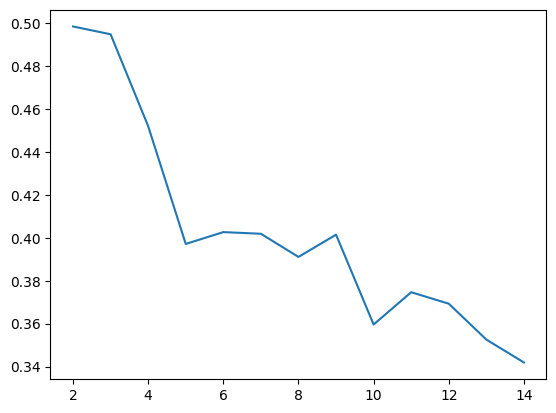

In [ ]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

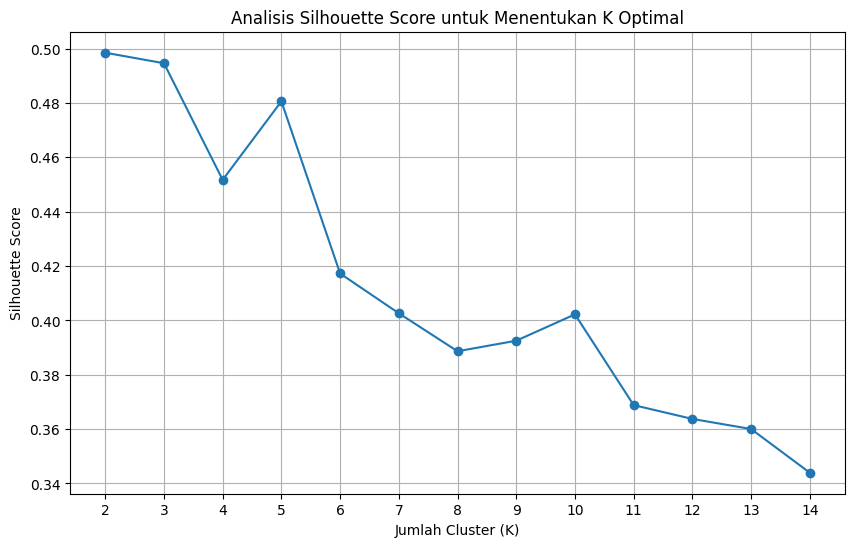

In [ ]:
sse_ = []
k_range_silhouette = list(range(2, 15)) # Rentang K untuk Silhouette (minimal 2)
for k in k_range_silhouette:
     # Tambahkan n_init dan random_state
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42).fit(RFM_norm1)
    sse_.append([k, silhouette_score(RFM_norm1, kmeans.labels_)])

# Konversi ke DataFrame untuk plotting yang lebih mudah
silhouette_df = pd.DataFrame(sse_, columns=['K', 'SilhouetteScore'])

# Plotting
plt.figure(figsize=(10, 6)) # Atur ukuran figure
plt.plot(silhouette_df['K'], silhouette_df['SilhouetteScore'], marker='o') # Tambahkan marker
plt.title('Analisis Silhouette Score untuk Menentukan K Optimal') # Judul Grafik
plt.xlabel('Jumlah Cluster (K)') # Label Sumbu X
plt.ylabel('Silhouette Score') # Label Sumbu Y
plt.xticks(k_range_silhouette) # Tampilkan semua angka K di sumbu X
plt.grid(True) # Tambahkan grid
plt.show() # Tampilkan grafik

##Sum of Squared Distance


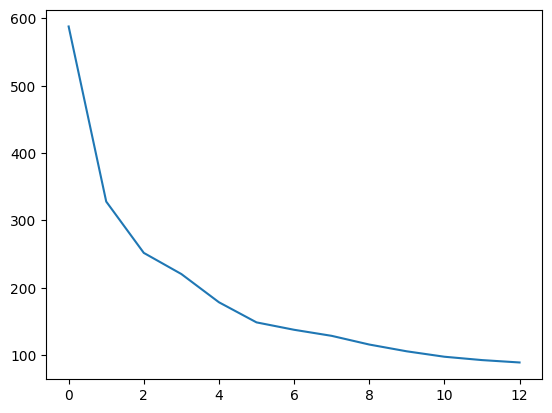

In [ ]:
# sum of squared distances
ssd = []
for num_clusters in range(2,15):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

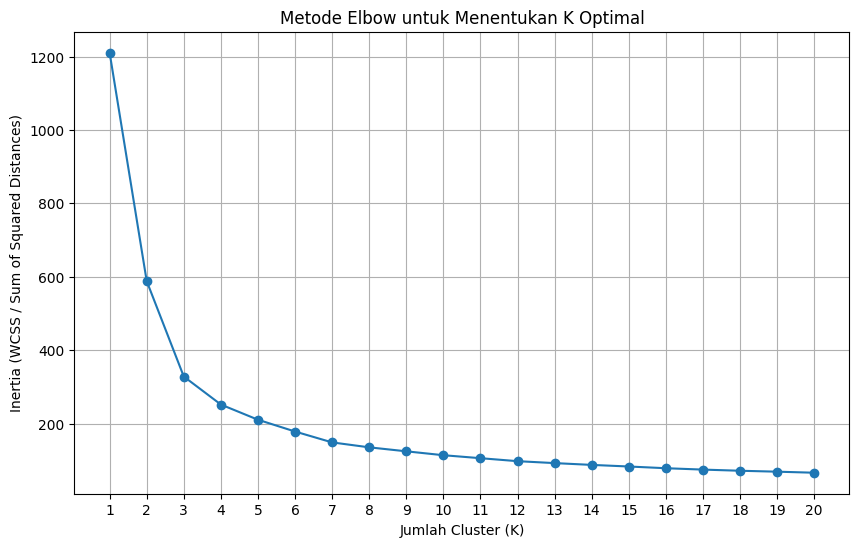

In [ ]:
ssd = []
k_range = list(range(1, 21)) # Definisikan rentang K secara eksplisit
for num_clusters in k_range:
    # Tambahkan n_init dan random_state untuk hasil yang lebih stabil & reproduktif
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100, n_init=10, random_state=42)
    model_clus.fit(RFM_norm1)
    ssd.append(model_clus.inertia_)

# Plotting a line graph
plt.figure(figsize=(10, 6)) # Atur ukuran figure
plt.plot(k_range, ssd, marker='o') # Tambahkan marker 'o' untuk setiap titik K
plt.title('Metode Elbow untuk Menentukan K Optimal') # Judul Grafik
plt.xlabel('Jumlah Cluster (K)') # Label Sumbu X
plt.ylabel('Inertia (WCSS / Sum of Squared Distances)') # Label Sumbu Y
plt.xticks(k_range) # Tampilkan semua angka K di sumbu X jika memungkinkan
plt.grid(True) # Tambahkan grid
plt.show() # Tampilkan grafik

##Modeling

In [ ]:
# Kmeans with K=3
model_clus5 = KMeans(n_clusters = 3, max_iter=100)
model_clus5.fit(RFM_norm1)

KMeans(max_iter=100, n_clusters=3)

In [ ]:
# analysis of clusters formed
RFM.index = pd.RangeIndex(len(RFM.index))
RFM_km = pd.concat([RFM, pd.Series(model_clus5.labels_)], axis=1)
RFM_km.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency', 'ClusterID']
RFM_km.head()

,CustomerID,Amount,Frequency,Recency,ClusterID
0,12346,3693.2325,1.0,326,1
1,12347,3693.2325,182.0,2,2
2,12348,1797.2400,31.0,75,0
3,12349,1757.5500,73.0,19,0
4,12350,334.4000,17.0,310,1


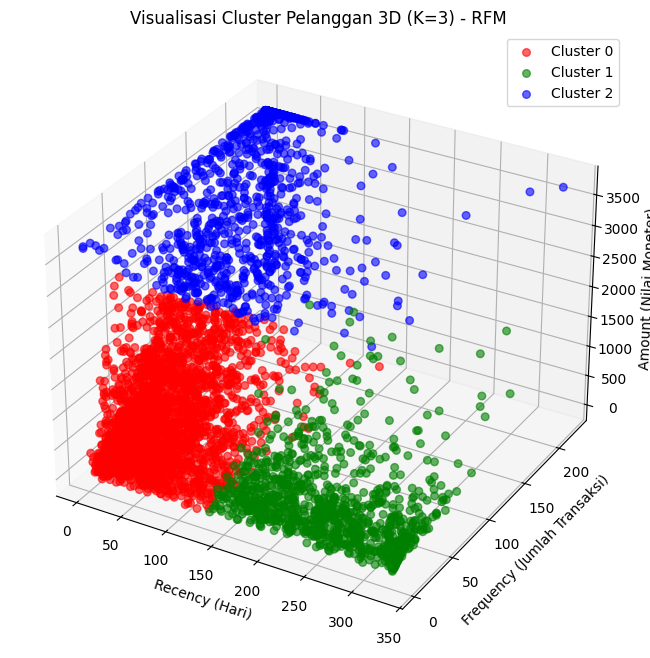

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Import untuk plotting 3D
import pandas as pd
# Tidak perlu seaborn hanya untuk warna ini

# Asumsikan RFM_km sudah tersedia dan berisi kolom:
# 'Recency', 'Frequency', 'Amount', 'ClusterID'
# Dan ClusterID berisi nilai 0, 1, dan 2

# --- Plotting 3D dengan Warna Spesifik ---

# 1. Definisikan pemetaan warna
# Pastikan urutan ini sesuai: ClusterID 0 -> red, 1 -> green, 2 -> blue
color_map = {
    0: 'red',
    1: 'green',
    2: 'blue'
}

# 2. Buat figure dan axes 3D
fig = plt.figure(figsize=(12, 8)) # Ukuran figure
ax = fig.add_subplot(111, projection='3d') # Membuat subplot 3D

# 3. Iterasi melalui setiap cluster dan plot secara terpisah
for cluster_id, color in color_map.items():
    # Filter data untuk cluster saat ini
    cluster_data = RFM_km[RFM_km['ClusterID'] == cluster_id]

    # Jika cluster ini ada datanya (untuk K yang lebih kecil mungkin ada yg kosong)
    if not cluster_data.empty:
        # Tentukan data untuk setiap sumbu dari data yang difilter
        x = cluster_data['Recency']
        y = cluster_data['Frequency']
        z = cluster_data['Amount']

        # Membuat scatter plot 3D untuk cluster ini saja
        # Gunakan 'color=' dengan warna spesifik dan tambahkan 'label'
        ax.scatter(x, y, z, color=color, label=f'Cluster {cluster_id}', s=30, alpha=0.6)

# 4. Menambahkan label pada sumbu
ax.set_xlabel('Recency (Hari)')
ax.set_ylabel('Frequency (Jumlah Transaksi)')
ax.set_zlabel('Amount (Nilai Moneter)')

# 5. Menambahkan judul
ax.set_title('Visualisasi Cluster Pelanggan 3D (K=3) - RFM')

# 6. Menambahkan legenda
ax.legend()

# 7. Tampilkan plot
plt.show()

In [ ]:
# RFM_km.Recency = RFM_km.Recency.dt.days
km_clusters_amount = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Amount.mean())
km_clusters_frequency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Frequency.mean())
km_clusters_recency = pd.DataFrame(RFM_km.groupby(["ClusterID"]).Recency.mean())

In [ ]:
df = pd.concat([pd.Series([0,1,2]), km_clusters_amount, km_clusters_frequency, km_clusters_recency], axis=1)
df.columns = ["ClusterID", "Amount_mean", "Frequency_mean", "Recency_mean"]
df.head()

,ClusterID,Amount_mean,Frequency_mean,Recency_mean
0,0,727.471168,44.525350,49.060315
1,1,410.808821,24.242044,245.615236
2,2,2913.464883,170.085799,29.501972


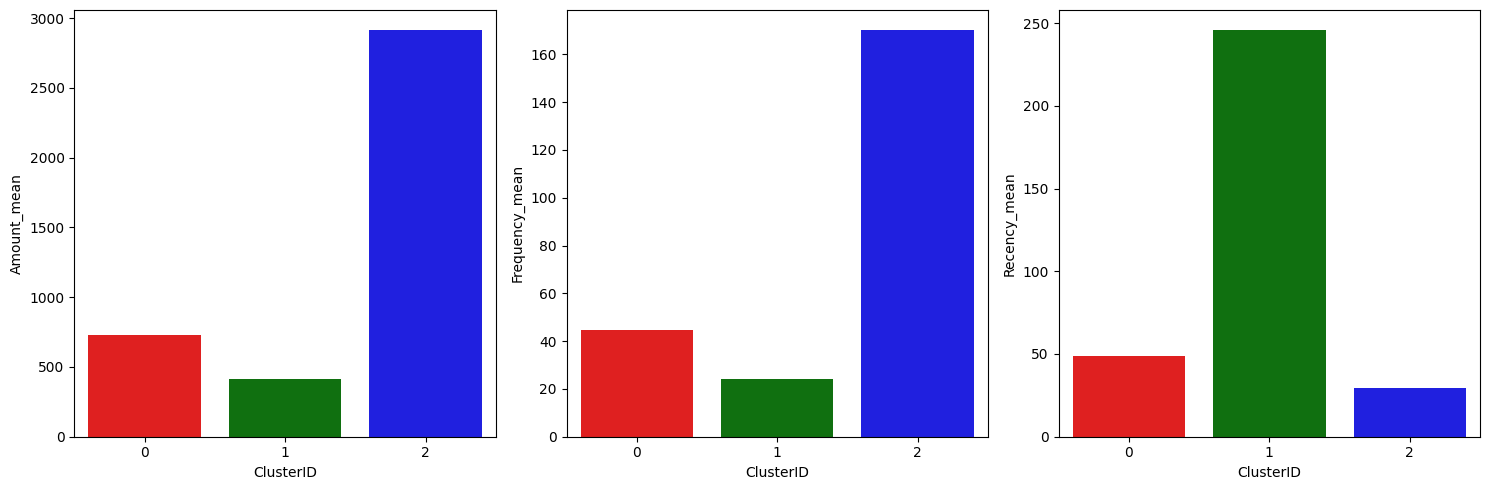

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define a list of colors for each ClusterID
colors = ['red', 'green', 'blue']  # Adjust colors as needed

# Assign 'ClusterID' to 'hue' and set 'legend=False'
sns.barplot(x=df.ClusterID, y=df.Amount_mean, ax=axs[0], hue=df.ClusterID, palette=colors, dodge=False, legend=False)
sns.barplot(x=df.ClusterID, y=df.Frequency_mean, ax=axs[1], hue=df.ClusterID, palette=colors, dodge=False, legend=False)
sns.barplot(x=df.ClusterID, y=df.Recency_mean, ax=axs[2], hue=df.ClusterID, palette=colors, dodge=False, legend=False)

plt.tight_layout()
plt.show()

## Interpretasi

Recency (R): Semakin rendah nilainya (baru saja transaksi), semakin baik.

Frequency (F): Semakin tinggi nilainya (sering transaksi), semakin baik.

Amount/Monetary (M): Semakin tinggi nilainya (jumlah belanja besar), semakin baik.
### Interpretasi setiap cluster yang terbentuk
- Cluster 0 (Pelanggan Terbaik/VIP): Pelanggan paling berharga yang baru
saja bertransaksi (Recency sangat rendah), sangat sering membeli (Frequency sangat tinggi), dan dengan nilai belanja sangat tinggi (Amount sangat tinggi).
- Cluster 2 (Pelanggan Aktif/Potensial): Pelanggan aktif reguler yang cukup baru bertransaksi (Recency rendah-sedang), sedikit jarang membeli (frekuensi rendah-sedang), dan nilai belanja sedang (Amount rendah-sedang).
- Cluster 1 (Pelanggan Tidak Aktif/Berisiko): Pelanggan yang sudah sangat lama tidak aktif (Recency sangat tinggi), jarang membeli (Frequency sangat rendah), dan nilai belanjanya rendah (Amount sangat rendah), berisiko tinggi untuk churn.

## Evaluation

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
# a) Silhouette Score (Anda sudah hitung)
# Mengukur seberapa mirip suatu objek dengan clusternya sendiri dibandingkan dengan cluster lain.
# Rentang: -1 hingga 1. Nilai lebih tinggi -> cluster lebih padat dan terpisah dengan baik.
sil_score = silhouette_score(RFM_norm1, model_clus5.labels_)
print(f"Silhouette Score: {sil_score:.4f}")
# Interpretasi kasar: > 0.5 dianggap struktur reasonable, > 0.7 struktur kuat, < 0.2 struktur lemah.

# b) Davies-Bouldin Index (DBI)
# Mengukur rata-rata 'kemiripan' antara setiap cluster dengan cluster yang paling mirip dengannya.
# Kemiripan adalah rasio jarak dalam cluster terhadap jarak antar cluster.
# Rentang: >= 0. Nilai lebih RENDAH -> cluster lebih baik (lebih terpisah).
db_score = davies_bouldin_score(RFM_norm1, model_clus5.labels_)
print(f"Davies-Bouldin Index: {db_score:.4f}")



Silhouette Score: 0.4946
Davies-Bouldin Index: 0.6947
